# Compare Itens

In [1]:
import pandas as pd
from CompareGroupsFunctions import *
import plotly.express as px
import plotly.graph_objects as go

In [2]:
def get_all_questions_comp(comp, area_hab_map):
    all_questions_comp = pd.DataFrame()

    for ano in ['2019', '2018', '2017']:
        questions_comp = pd.DataFrame()

        cr_comp = pd.read_csv('../Data/Processed/ENEM'+ano+'/CR_data/CR_'+comp+'.csv')
        questions_comp['PropAcertoCR'] = cr_comp[cr_comp.columns[2:]].mean()

        all_comp = pd.read_csv('../Data/Processed/ENEM'+ano+'/All_'+comp+'.csv')
        questions_comp['PropAcertoTodos'] = all_comp[all_comp.columns[2:]].mean()

        questions_comp['CO_ITEM'] = questions_comp.index
        questions_comp['CO_ITEM'] = questions_comp['CO_ITEM'].str.split().str[-1]

        questions_comp['Ano'] = ano

        ch_comp = GroupComparator(comp=comp, ano=ano, gp_feat='TP_SEXO', gp_name='sexo', 
                                       gp_map={'M':'Masculino', 'F': 'Feminino'})
        df_gp = ch_comp.get_df_gp()
        bin_ch = ch_comp.bin_scores()
        auc_ch = ch_comp.auc_groups()

        questions_comp['AUC_CR'] = auc_ch['Geral']
        questions_comp['AUC_M'] = auc_ch['M']
        questions_comp['AUC_F'] = auc_ch['F']
        
        questions_comp['Prop_M'] = df_gp['M'][df_gp['M'].columns[2:-1]].mean()
        questions_comp['Prop_F'] = df_gp['F'][df_gp['F'].columns[2:-1]].mean()

        questions_comp['CO_HABILIDADE'] = 0
        if ano=='2019':
            questoes_pd = pd.read_csv("../Data/Original/microdados_enem_"+ano+"/DADOS/ITENS_PROVA_"+ano+".csv")
        else:
            questoes_pd = pd.read_csv("../Data/Original/microdados_enem_"+ano+"/DADOS/ITENS_PROVA_"+ano+".csv",
                            sep=';')
        for quest in list(questions_comp['CO_ITEM']):
            quest_cod = questoes_pd[questoes_pd['CO_ITEM']==int(quest)]['CO_HABILIDADE'].iloc[0]
            questions_comp.loc[questions_comp['CO_ITEM']==quest,'CO_HABILIDADE'] = quest_cod

        all_questions_comp = all_questions_comp.append(questions_comp)

    all_questions_comp['CO_AREA'] = all_questions_comp['CO_HABILIDADE'].map(area_hab_map)
        
    return all_questions_comp


## 1. Ciências Humanas

In [3]:
hab_area_map_CH = {'Area1': [1,2,3,4,5],
                   'Area2': [6,7,8,9,10],
                   'Area3': [11,12,13,14,15],
                   'Area4': [16,17,18,19,20],
                   'Area5': [21,22,23,24,25],
                   'Area6': [26,27,28,29,30]
                  }

area_hab_map_CH = {}
for key in hab_area_map_CH: 
    for item in hab_area_map_CH[key]:
        area_hab_map_CH[item] = key

In [4]:
all_questions_CH = get_all_questions_comp('CH', area_hab_map_CH)

<AxesSubplot:title={'center':'PropAcertoCR'}, xlabel='[CO_HABILIDADE]'>

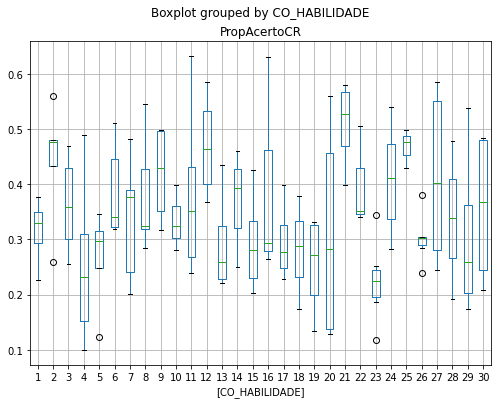

In [5]:
all_questions_CH[['CO_HABILIDADE','PropAcertoCR']].boxplot(by='CO_HABILIDADE', figsize=(8,6))

<AxesSubplot:title={'center':'AUC_CR'}, xlabel='[CO_HABILIDADE]'>

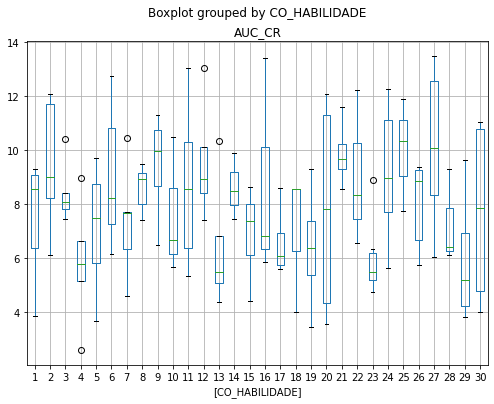

In [6]:
all_questions_CH[['CO_HABILIDADE','AUC_CR']].boxplot(by='CO_HABILIDADE', figsize=(8,6))

In [42]:
fig = px.scatter(all_questions_CH, x="AUC_M", y="AUC_F", color="CO_AREA",
                 hover_data=['CO_ITEM','CO_HABILIDADE','Ano'],
                 title="Comparação de AUC para sexo Masculino e Feminino - CH")

fig.add_trace(
    go.Scatter(
        x=[2, 14],
        y=[2, 14],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)

fig.show()

## 2. Ciências da Natureza

In [19]:
hab_area_map_CN = {'Area1':        [1,2,3,4],      # 
                   'Tecnologia':   [5,6,7],        # 
                   'Ambiental':    [8,9,10,11,12], # Ambiental
                   'Saúde':        [13,14,15,16],  # Interações entre organismos e ambiente
                   'Métodos':      [17,18,19],     # 
                   'Física':       [20,21,22,23],  # Física
                   'Química':      [24,25,26,27],  # Química
                   'Biologia':     [28,29,30]      # Biologia
                  }

area_hab_map_CN = {}
for key in hab_area_map_CN: 
    for item in hab_area_map_CN[key]:
        area_hab_map_CN[item] = key

In [20]:
all_questions_CN = get_all_questions_comp('CN', area_hab_map_CN)
all_questions_CN

,PropAcertoCR,PropAcertoTodos,CO_ITEM,Ano,AUC_CR,AUC_M,AUC_F,Prop_M,Prop_F,CO_HABILIDADE,CO_AREA
Item 82364,0.317131,0.295002,82364,2019,8.735879,8.539007,8.891752,0.315775,0.318111,27,Química
Item 117836,0.145601,0.158300,117836,2019,5.779421,6.867714,4.431780,0.203994,0.103411,23,Física
Item 29776,0.483871,0.475891,29776,2019,13.132936,13.633079,12.766195,0.551275,0.435168,30,Biologia
Item 117999,0.339947,0.295148,117999,2019,11.227275,11.422313,11.103714,0.394650,0.300422,3,Area1
Item 117746,0.156262,0.157306,117746,2019,4.525638,4.361524,4.849492,0.159988,0.153571,9,Ambiental
...,...,...,...,...,...,...,...,...,...,...,...
Item 43880,0.085684,0.087109,43880,2017,2.127621,2.302692,1.829445,0.087600,0.084288,20,Física
Item 8757,0.483567,0.481298,8757,2017,11.427106,11.296259,11.522460,0.506245,0.467043,19,Métodos
Item 48655,0.154328,0.151810,48655,2017,4.040705,4.150167,3.951460,0.171011,0.142173,21,Física
Item 17983,0.215974,0.212235,17983,2017,6.430219,6.212112,6.652788,0.216833,0.215349,24,Química


<AxesSubplot:title={'center':'PropAcertoCR'}, xlabel='[CO_HABILIDADE]'>

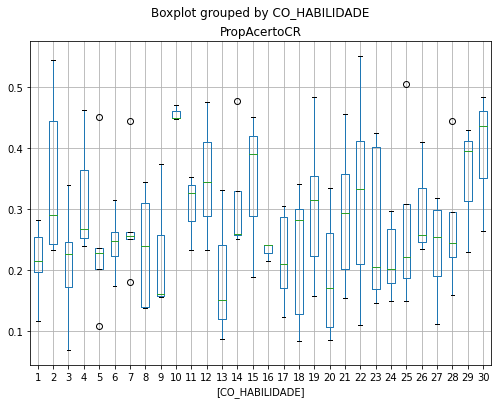

In [21]:
all_questions_CN[['CO_HABILIDADE','PropAcertoCR']].boxplot(by='CO_HABILIDADE', figsize=(8,6))

<AxesSubplot:title={'center':'PropAcertoCR'}, xlabel='[CO_AREA]'>

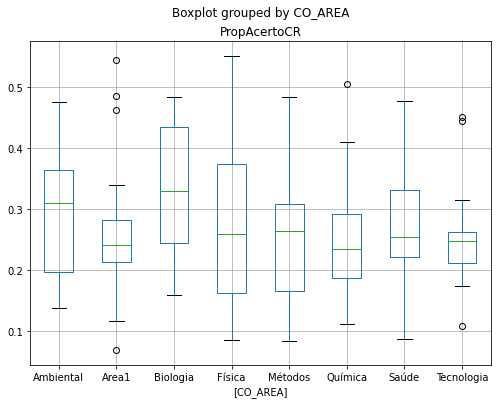

In [22]:
all_questions_CN[['CO_AREA','PropAcertoCR']].boxplot(by='CO_AREA', figsize=(8,6))

In [28]:
fig = px.scatter(all_questions_CN, x="AUC_M", y="AUC_F", color="CO_AREA",
                 hover_data=['CO_ITEM','CO_HABILIDADE','Ano'],
                 title="Comparação de AUC para sexo Masculino e Feminino")

fig.add_trace(
    go.Scatter(
        x=[1, 14],
        y=[1, 14],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)

fig.show()

In [30]:
fig = px.scatter(all_questions_CN, x="Prop_M", y="Prop_F", color="CO_AREA",
                 hover_data=['CO_ITEM','CO_HABILIDADE','Ano'],
                 title="Comparação da Proporção de Acertos entre os sexos Masculino e Feminino")

fig.add_trace(
    go.Scatter(
        x=[0, 0.6],
        y=[0, 0.6],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)

fig.show()

## 3. Matemática

In [32]:
hab_area_map_MT = {'Números':               [1,2,3,4,5],       # Construir significados para os números
                   'Geometria':             [6,7,8,9],         # Geometria
                   'Grandezas e Medidas':   [10,11,12,13,14],  # Grandezas e medidas
                   'Variação de grandezas': [15,16,17,18],     # Variação de grandezas
                   'Álgebra':               [19,20,21,22,23],  # Álgebra
                   'Gráficos e Tabelas':    [24,25,26],        # Gráficos e tabelas
                   'Aleatoriedade':         [27,28,29,30]      # Aleatoriedade
                  }

area_hab_map_MT = {}
for key in hab_area_map_MT: 
    for item in hab_area_map_MT[key]:
        area_hab_map_MT[item] = key

In [33]:
all_questions_MT = get_all_questions_comp('MT', area_hab_map=area_hab_map_MT)
all_questions_MT

,PropAcertoCR,PropAcertoTodos,CO_ITEM,Ano,AUC_CR,AUC_M,AUC_F,Prop_M,Prop_F,CO_HABILIDADE,CO_AREA
Item 117635,0.575998,0.536825,117635,2019,11.733138,12.565768,11.051016,0.659363,0.515763,6,Geometria
Item 9779,0.150814,0.145589,9779,2019,2.753177,2.547481,2.909368,0.151216,0.150524,21,Álgebra
Item 111608,0.174240,0.158228,111608,2019,4.000547,4.265648,3.722508,0.227066,0.136070,5,Números
Item 111696,0.301043,0.263630,111696,2019,6.751448,6.799687,6.662679,0.350359,0.265410,15,Variação de grandezas
Item 63187,0.540559,0.478305,63187,2019,11.355349,10.770384,11.808331,0.562853,0.524451,1,Números
...,...,...,...,...,...,...,...,...,...,...,...
Item 60235,0.236559,0.235765,60235,2017,4.689647,4.603971,4.768613,0.240295,0.233836,18,Variação de grandezas
Item 95803,0.299958,0.294934,95803,2017,6.532205,6.245982,6.785786,0.314336,0.289481,5,Números
Item 38563,0.624376,0.613365,38563,2017,12.742465,12.182151,13.150226,0.630552,0.619876,24,Gráficos e Tabelas
Item 61485,0.258609,0.256918,61485,2017,5.182839,5.714768,4.689349,0.298573,0.229490,28,Aleatoriedade


<AxesSubplot:title={'center':'AUC_CR'}, xlabel='[CO_HABILIDADE]'>

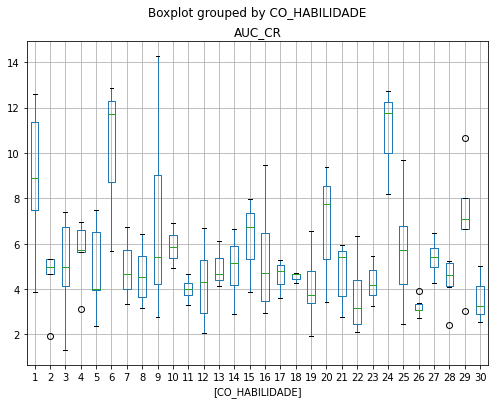

In [34]:
all_questions_MT[['CO_HABILIDADE','AUC_CR']].boxplot(by='CO_HABILIDADE', figsize=(8,6))

<AxesSubplot:title={'center':'PropAcertoCR'}, xlabel='[CO_HABILIDADE]'>

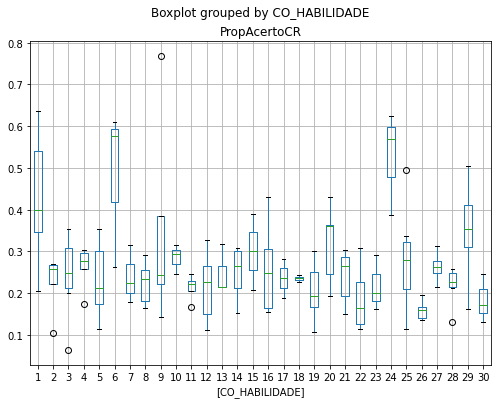

In [35]:
all_questions_MT[['CO_HABILIDADE','PropAcertoCR']].boxplot(by='CO_HABILIDADE', figsize=(8,6))

<AxesSubplot:title={'center':'PropAcertoCR'}, xlabel='[CO_AREA]'>

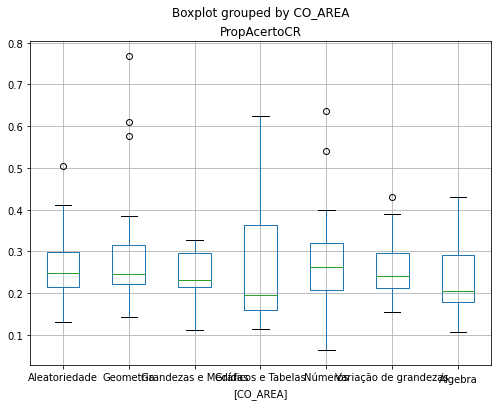

In [36]:
all_questions_MT[['CO_AREA','PropAcertoCR']].boxplot(by='CO_AREA', figsize=(8,6))

<AxesSubplot:title={'center':'AUC_CR'}, xlabel='[CO_AREA]'>

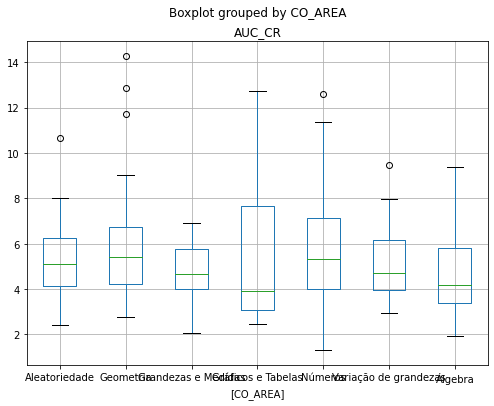

In [37]:
all_questions_MT[['CO_AREA','AUC_CR']].boxplot(by='CO_AREA', figsize=(8,6))

In [43]:
fig = px.scatter(all_questions_MT, x="AUC_M", y="AUC_F", color="CO_AREA",
                 hover_data=['CO_ITEM','CO_HABILIDADE','Ano'],
                 title="Comparação de AUC para sexo Masculino e Feminino - MT")

fig.add_trace(
    go.Scatter(
        x=[1, 15],
        y=[1, 15],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)

fig.show()
fig.show()

In [45]:
fig = px.scatter(all_questions_MT, x="Prop_M", y="Prop_F", color="CO_AREA",
                 hover_data=['CO_ITEM','CO_HABILIDADE','Ano'])

fig.add_trace(
    go.Scatter(
        x=[0, 1],
        y=[0, 1],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)

fig.show()